# Linear Regression in TensorFlow

This example is refactored from https://www.tensorflow.org/guide/eager. We create a complete example of using linear regression to predict the paramters of the function 

$$y = f(x) + noise = 3 x + 2 + noise$$

Given a point $x$ we want to predict the value of $f(x)$. We train the model on 100 data pairs $(x,y)$. 

We want the model to learn a linear model 

$$\hat{y} = W x + b$$

Note that, we use `tf.GradientTape` to record the gradient of the loss function with respect our model paramters.  

We use MSE to calcuate the loss 

$$MSE = \frac{1}{n} (y-\hat{y})^2$$

We use Gradient Descent to update the paramters 

$$W = W - \alpha  \frac{\partial MSE}{\partial W}$$

$$b = b - \alpha  \frac{\partial MSE}{\partial b}$$

In [1]:
import tensorflow as tf

from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
X, y = make_regression(n_samples=100, n_features=1, random_state=42, noise=5)
X = tf.constant(X.flatten(), dtype=np.float64)
y = tf.constant(y, dtype=np.float64)

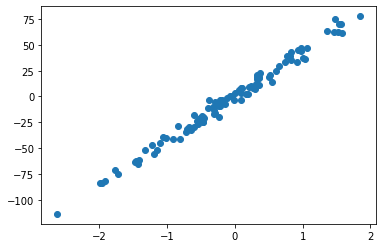

In [3]:
# #100 data points 
# NUM_EXAMPLES = 100

# #define inputs and outputs with some noise 
# X = tf.random.normal([NUM_EXAMPLES])  #inputs 
# noise = tf.random.normal([NUM_EXAMPLES]) #noise 
# y = X * 3 + 2 + noise  #true output

plt.scatter(X, y)

# Contruction Phase

In [4]:
#create model paramters with initial values 
W = tf.Variable(0., dtype=np.float64)
b = tf.Variable(0., dtype=np.float64)

In [5]:
#training info
train_steps = 300
learning_rate = 0.01

In [6]:

#watch the gradient flow
@tf.function  # Make it fast.
def train_on_batch(X, y):
    with tf.GradientTape() as tape:
        #forward pass 
        yhat = X * W + b

        #calcuate the loss (difference squared error)
        error = yhat - y
        loss = tf.reduce_mean(error**2)

    #evalute the gradient with the respect to the paramters
    dW, db = tape.gradient(loss, [W, b])

    #update the paramters using Gradient Descent  
    W.assign_sub(dW * learning_rate)
    b.assign_sub(db * learning_rate)

    return(loss)

In [7]:
#print the loss every 20 iterations
for i in range(train_steps):
    loss = train_on_batch(X,y)
    
    if i % 20 == 0:
        print("Loss at step {:03d}: {:.3f}".format(i, loss))
        
        
print(f'W : {W.numpy()} , b  = {b.numpy()} ')

Loss at step 000: 1550.677
Loss at step 020: 801.888
Loss at step 040: 422.167
Loss at step 060: 228.033
Loss at step 080: 128.072
Loss at step 100: 76.284
Loss at step 120: 49.313
Loss at step 140: 35.204
Loss at step 160: 27.796
Loss at step 180: 23.895
Loss at step 200: 21.835
Loss at step 220: 20.746
Loss at step 240: 20.168
Loss at step 260: 19.862
Loss at step 280: 19.699
W : 42.75548715203888 , b  = 0.4600352278560404 


In [8]:
loss = train_on_batch(X,y)

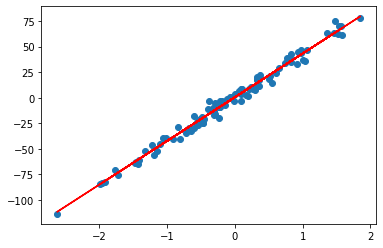

In [9]:
plt.scatter(X, y)
plt.plot(X, W * X + b, color='red')